In [1]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Manually define column names based on the data structure
column_names = ['Rating', 'Title', 'Review_Text']

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv', names=column_names)

In [6]:
test = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv', names=column_names)

In [7]:
train.head()

,Rating,Title,Review_Text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [8]:
train.value_counts('Rating')

,count
Rating,
1,1800000
2,1800000


In [9]:
test.head()

,Rating,Title,Review_Text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [10]:
# Take a random sample of 10% of the data
sample_df = train.sample(frac=0.1, random_state=42)

In [11]:
sample_df.value_counts('Rating')


,count
Rating,
2,180101
1,179899



# **1.   Data Cleaning**

Ensures that the dataset is properly loaded and available for analysis. This is fundamental for any further analysis. Any issues here could indicate data corruption or formatting problems that need to be addressed.

In [12]:
sample_df["Title"] = sample_df["Title"].astype(str)

def clean_text(df, field):
    train[field] = train[field].str.replace(r"@"," at ")
    train[field] = train[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    train[field] = train[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    train[field] = train[field].str.replace(r"http\S+","")
    train[field] = train[field].str.lower()
    return df

clean_text(sample_df,"Title")


,Rating,Title,Review_Text
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...
1443106,1,Toast too dark,"Even on the lowest setting, the toast is too d..."
3463669,2,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...
2914699,1,Are we pretending everyone is married?,The authors pretend that parents neither die n...
1603231,1,Not worth your time,"Might as well just use a knife, this product h..."
...,...,...,...
3426535,2,IT WILL BE THE BEST!,This game is being developed by the same team ...
2593233,1,Cheap - Does not work,Did not take any wrinkles out and just leaked ...
206572,2,Bye It Flamen' Fast,"If you want to read ""Dragon's Breath"" I sugges..."
2004526,2,"$10 horse, $40 saddle",The art work is all line drawings and not a lo...


In [13]:
### Download the necessary resources from nltk (tokenizers and stopwords corpus)
# Punkt tokenizer for word tokenization
nltk.download('punkt')

# Stopwords list in multiple languages
nltk.download('stopwords')

# Initialize the Porter stemmer and load English stopwords
stemmer = PorterStemmer()

# Create a set of English stopwords for efficient lookup
stop_words = set(stopwords.words('english'))

# Function to clean the text by removing URLs, handles, and punctuation
def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs (http, https, and www links)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove markdown-style links [text](link)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # Remove handles (@username mentions)
        text = re.sub(r'@\w+', '', text)

        # Remove punctuation and special characters
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

# Function to tokenize the text into individual words
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# Function to remove stopwords from the tokenized text
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

# Function to apply stemming to the tokens
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

### Apply the functions to the DataFrame
# Clean the text
sample_df['Cleaned_Review'] = sample_df['Review_Text'].apply(clean_text)

# Tokenize the cleaned text
sample_df['Tokenized_Review'] = sample_df['Cleaned_Review'].apply(tokenize_text)

# Apply stemming to the tokenized words
sample_df['Stemmed_Review'] = sample_df['Tokenized_Review'].apply(stem_tokens)

# Remove stopwords from the tokenized text
sample_df['No_Stopwords_Review'] = sample_df['Tokenized_Review'].apply(remove_stopwords)

# Display the first few rows of the DataFrame to visualize the dataset
sample_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Rating,Title,Review_Text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...,this product consists of a piece of thin flexi...,"[this, product, consists, of, a, piece, of, th...","[thi, product, consist, of, a, piec, of, thin,...","[product, consists, piece, thin, flexible, ins..."
1443106,1,Toast too dark,"Even on the lowest setting, the toast is too d...",even on the lowest setting the toast is too da...,"[even, on, the, lowest, setting, the, toast, i...","[even, on, the, lowest, set, the, toast, is, t...","[even, lowest, setting, toast, dark, liking, a..."
3463669,2,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...,i enjoyed this disc the video is stunning i ag...,"[i, enjoyed, this, disc, the, video, is, stunn...","[i, enjoy, thi, disc, the, video, is, stun, i,...","[enjoyed, disc, video, stunning, agree, others..."
2914699,1,Are we pretending everyone is married?,The authors pretend that parents neither die n...,the authors pretend that parents neither die n...,"[the, authors, pretend, that, parents, neither...","[the, author, pretend, that, parent, neither, ...","[authors, pretend, parents, neither, die, divo..."
1603231,1,Not worth your time,"Might as well just use a knife, this product h...",might as well just use a knife this product ho...,"[might, as, well, just, use, a, knife, this, p...","[might, as, well, just, use, a, knife, thi, pr...","[might, well, use, knife, product, holds, next..."


In [14]:
sample_df.head()

,Rating,Title,Review_Text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...,this product consists of a piece of thin flexi...,"[this, product, consists, of, a, piece, of, th...","[thi, product, consist, of, a, piec, of, thin,...","[product, consists, piece, thin, flexible, ins..."
1443106,1,Toast too dark,"Even on the lowest setting, the toast is too d...",even on the lowest setting the toast is too da...,"[even, on, the, lowest, setting, the, toast, i...","[even, on, the, lowest, set, the, toast, is, t...","[even, lowest, setting, toast, dark, liking, a..."
3463669,2,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...,i enjoyed this disc the video is stunning i ag...,"[i, enjoyed, this, disc, the, video, is, stunn...","[i, enjoy, thi, disc, the, video, is, stun, i,...","[enjoyed, disc, video, stunning, agree, others..."
2914699,1,Are we pretending everyone is married?,The authors pretend that parents neither die n...,the authors pretend that parents neither die n...,"[the, authors, pretend, that, parents, neither...","[the, author, pretend, that, parent, neither, ...","[authors, pretend, parents, neither, die, divo..."
1603231,1,Not worth your time,"Might as well just use a knife, this product h...",might as well just use a knife this product ho...,"[might, as, well, just, use, a, knife, this, p...","[might, as, well, just, use, a, knife, thi, pr...","[might, well, use, knife, product, holds, next..."


Provides a glimpse into the dataset structure, including the number of records, types of variables, and basic statistics. Understanding the shape and types of data (e.g., numerical, categorical) helps in determining suitable analysis techniques.

# **2- Sentiment Distripution**

Understanding the distribution of key variables (like ratings and sentiment polarity) helps identify patterns, such as whether ratings are skewed toward positive or negative ends. This can indicate general customer satisfaction levels.

<ipython-input-15-c850ae335f1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=sample_df, palette='viridis')


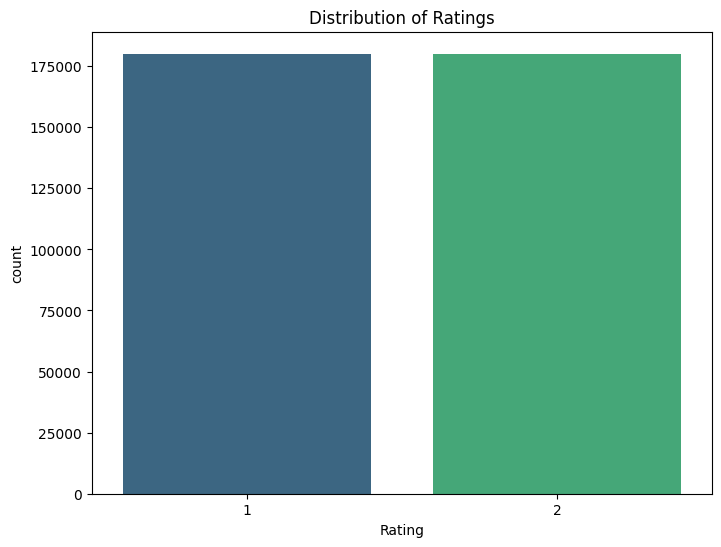

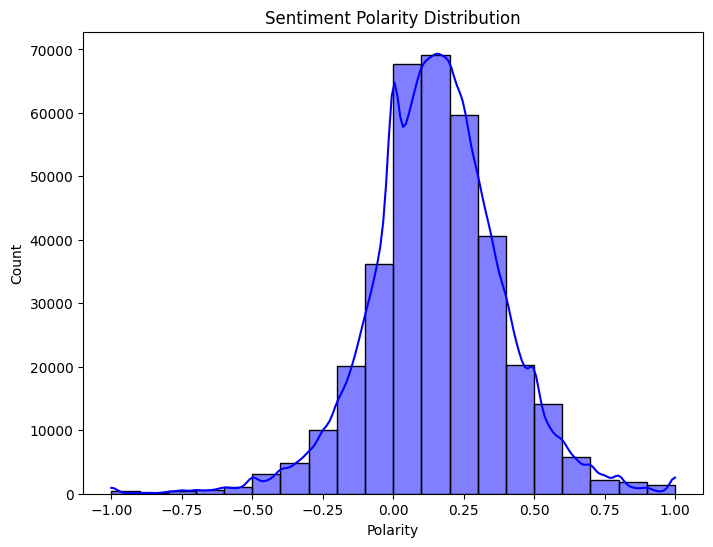

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=sample_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

# Polarity can be calculated using a sentiment analysis package like TextBlob
from textblob import TextBlob

# Function to calculate sentiment polarity (-1 to 1)
sample_df['Polarity'] = sample_df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment polarity distribution
plt.figure(figsize=(8, 6))
sns.histplot(sample_df['Polarity'], bins=20, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.show()


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer, which is part of the VADER sentiment analysis tool.
analyzer = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis to each review.
# The function takes in a 'review' (text) and returns the polarity scores, which include
# 'compound', 'positive', 'negative', and 'neutral' sentiment values.
def get_sentiment(review):
    return analyzer.polarity_scores(review)

# Apply the 'get_sentiment' function to each entry in the 'Cleaned_Review' column.
# Store the resulting sentiment scores (dictionary) in a new column 'vader_scores'.
sample_df['vader_scores'] = sample_df['Cleaned_Review'].apply(get_sentiment)

# Extract the 'compound' score from the 'vader_scores' dictionary for each review.
# The 'compound' score is a normalized score ranging from -1 (most negative) to +1 (most positive),
# summarizing the overall sentiment of the text.
sample_df['compound'] = sample_df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Function to classify the sentiment based on the 'compound' score.
# Scores >= 0.05 are classified as 'Positive', <= -0.05 as 'Negative', and anything in between as 'Neutral'.
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the 'classify_sentiment' function to the 'compound' score to get the overall sentiment
# classification (Positive, Negative, or Neutral) for each review.
sample_df['sentiment'] = sample_df['compound'].apply(classify_sentiment)

# Display the first few rows of the DataFrame, showing the cleaned review text,
# the 'compound' sentiment score, and the classified 'sentiment'.
print(sample_df[['Cleaned_Review', 'compound', 'sentiment']].head(10))

                                            Cleaned_Review  compound sentiment
2079998  this product consists of a piece of thin flexi...    0.8268  Positive
1443106  even on the lowest setting the toast is too da...   -0.5859  Negative
3463669  i enjoyed this disc the video is stunning i ag...    0.9545  Positive
2914699  the authors pretend that parents neither die n...   -0.0654  Negative
1603231  might as well just use a knife this product ho...   -0.1779  Negative
2944012  i think that the whole aspect of hitting the r...   -0.5202  Negative
3403602  i saw these movies originally in the theater l...   -0.6425  Negative
1039142  would not fit my new optima hd20 projector  as...    0.9013  Positive
431645   this is a great cd it is the normal oops cd pl...    0.9441  Positive
694263   the handle broke clean off after two weeks not...   -0.6321  Negative


1.   Calculating sentiment scores (polarity and subjectivity) offers quantitative measures of customer sentiment. This step provides a more nuanced understanding of how customers feel about products or services, beyond simple ratings.
2.   Visualizing the distribution of sentiment scores helps assess the overall sentiment of the reviews. For instance, if most sentiments are positive, it indicates favorable customer experiences. Conversely, a negative skew might suggest issues with the product or service.



<ipython-input-17-766d8b20354b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df, x='sentiment', palette='Set2')


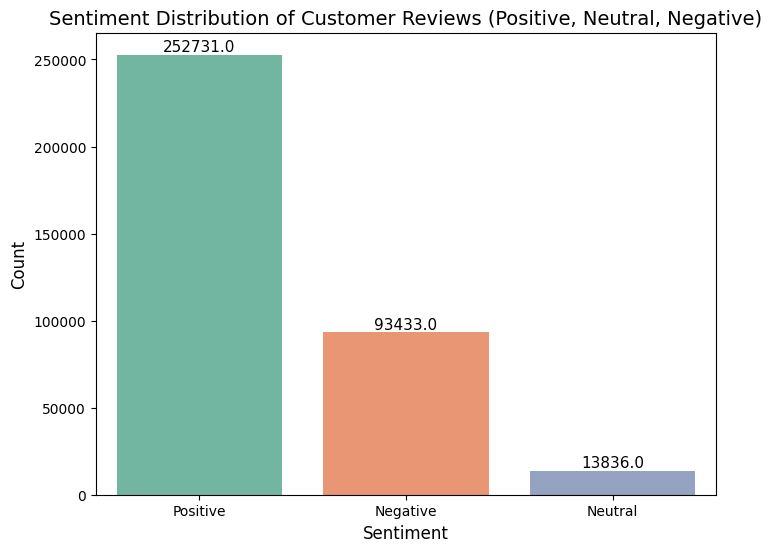

In [17]:
# Assuming df is already loaded and contains the 'sentiment' column
plt.figure(figsize=(8, 6))

# Count plot with a specific color palette
sns.countplot(data=sample_df, x='sentiment', palette='Set2')

# Add title and axis labels with adjusted font sizes
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=11)

# Display the plot
plt.show()

# **3- Sentiment and Review Trend Over Time**

Even without explicit timestamps, looking at sentiment changes over reviews can help infer trends in customer satisfaction. For example, if reviews improve over time, it may indicate effective changes in product quality or service.

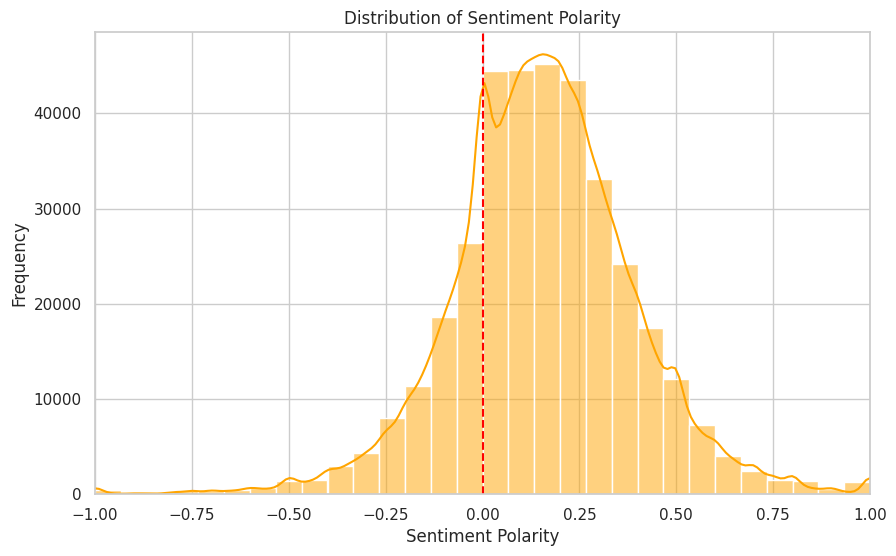

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Set the style for seaborn
sns.set(style='whitegrid')

# 1. Visualize Sentiment Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Polarity'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.xlim(-1, 1)  # Polarity ranges from -1 to 1
plt.axvline(0, color='red', linestyle='--')  # Indicate the neutral sentiment
plt.show()



In [20]:
# Top 5 Positive Reviews
top_positive_reviews = sample_df.nlargest(5, 'Polarity')[['Rating', 'Title', 'Review_Text', 'Polarity']]
print("Top 5 Positive Reviews:")
print(top_positive_reviews)

# Top 5 Negative Reviews
top_negative_reviews = sample_df.nsmallest(5, 'Polarity')[['Rating', 'Title', 'Review_Text', 'Polarity']]
print("\nTop 5 Negative Reviews:")
print(top_negative_reviews)


Top 5 Positive Reviews:
         Rating                         Title  \
182705        2                 physic sience   
2664533       2                 Great Product   
734079        2  Did we expect anything else?   
3101657       2                  It's greasy!   
1396922       2                      Perfect!   

                                               Review_Text  Polarity  
182705   I have had , and read this book before, Loaned...       1.0  
2664533  We had an alert just days after we received ou...       1.0  
734079   I thought this season was the best yet! The wr...       1.0  
3101657  Lol. It's Bubbles from Trailer Park....What's ...       1.0  
1396922  I had been looking for the perfect souffle dis...       1.0  

Top 5 Negative Reviews:
         Rating                          Title  \
1700260       1                DONT WASTE TIME   
3001779       1   coby mp3/cd player anti skip   
1859853       2               Gods and Vulcans   
2445795       1     Table of c

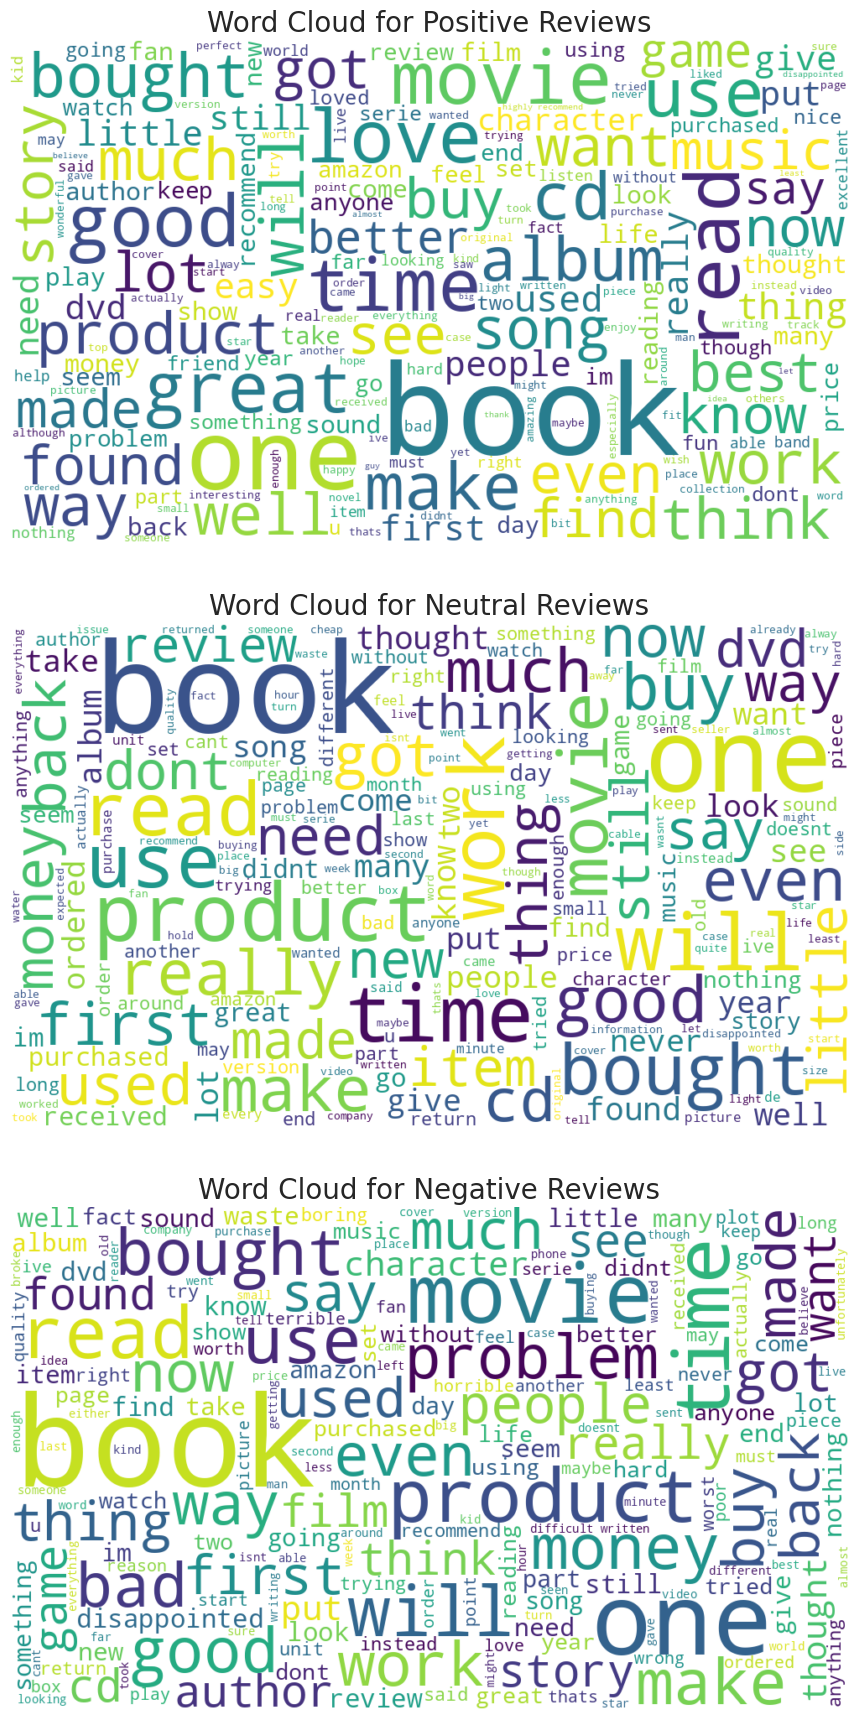

In [21]:
from wordcloud import WordCloud

# Separate reviews based on sentiment
positive_reviews = " ".join(sample_df[sample_df['sentiment'] == 'Positive']['Cleaned_Review'].tolist())
neutral_reviews = " ".join(sample_df[sample_df['sentiment'] == 'Neutral']['Cleaned_Review'].tolist())
negative_reviews = " ".join(sample_df[sample_df['sentiment'] == 'Negative']['Cleaned_Review'].tolist())

# Generate word clouds with larger dimensions and font size
wordcloud_positive = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(positive_reviews)
wordcloud_neutral = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(neutral_reviews)
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(negative_reviews)

# Plot the word clouds for each sentiment with larger figure size
plt.figure(figsize=(10, 18))

# Positive word cloud
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=20)
plt.axis('off')

# Neutral word cloud
plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews', fontsize=20)
plt.axis('off')

# Negative word cloud
plt.subplot(3, 1, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=20)
plt.axis('off')

# Show the word clouds
plt.tight_layout(pad=3)
plt.show()


In [22]:
sample_df.head()

,Rating,Title,Review_Text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review,Polarity,vader_scores,compound,sentiment
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...,this product consists of a piece of thin flexi...,"[this, product, consists, of, a, piece, of, th...","[thi, product, consist, of, a, piec, of, thin,...","[product, consists, piece, thin, flexible, ins...",0.085417,"{'neg': 0.032, 'neu': 0.83, 'pos': 0.139, 'com...",0.8268,Positive
1443106,1,Toast too dark,"Even on the lowest setting, the toast is too d...",even on the lowest setting the toast is too da...,"[even, on, the, lowest, setting, the, toast, i...","[even, on, the, lowest, set, the, toast, is, t...","[even, lowest, setting, toast, dark, liking, a...",0.050000,"{'neg': 0.178, 'neu': 0.758, 'pos': 0.064, 'co...",-0.5859,Negative
3463669,2,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...,i enjoyed this disc the video is stunning i ag...,"[i, enjoyed, this, disc, the, video, is, stunn...","[i, enjoy, thi, disc, the, video, is, stun, i,...","[enjoyed, disc, video, stunning, agree, others...",0.258226,"{'neg': 0.058, 'neu': 0.653, 'pos': 0.289, 'co...",0.9545,Positive
2914699,1,Are we pretending everyone is married?,The authors pretend that parents neither die n...,the authors pretend that parents neither die n...,"[the, authors, pretend, that, parents, neither...","[the, author, pretend, that, parent, neither, ...","[authors, pretend, parents, neither, die, divo...",-0.250000,"{'neg': 0.121, 'neu': 0.762, 'pos': 0.117, 'co...",-0.0654,Negative
1603231,1,Not worth your time,"Might as well just use a knife, this product h...",might as well just use a knife this product ho...,"[might, as, well, just, use, a, knife, this, p...","[might, as, well, just, use, a, knife, thi, pr...","[might, well, use, knife, product, holds, next...",-0.250000,"{'neg': 0.117, 'neu': 0.795, 'pos': 0.088, 'co...",-0.1779,Negative


Text(0, 0.5, 'Frequency')

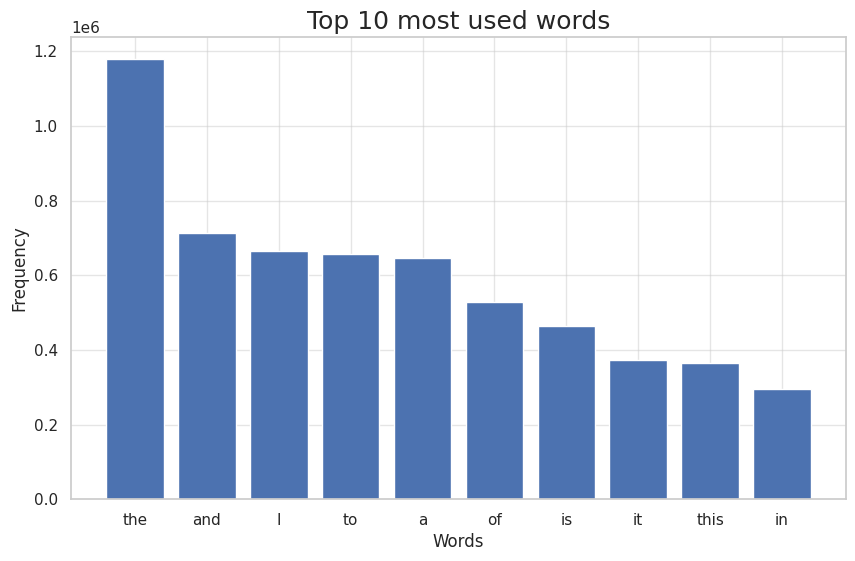

In [23]:
from collections import Counter

words = []
for text in sample_df['Review_Text']:
    words.extend(text.split())
word_count = Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title and labels
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

# **4- Review Length**

Analyzing the length of reviews (word count) can reveal trends about customer engagement. Longer reviews may indicate higher levels of engagement or sentiment intensity, while very short reviews could be less informative.

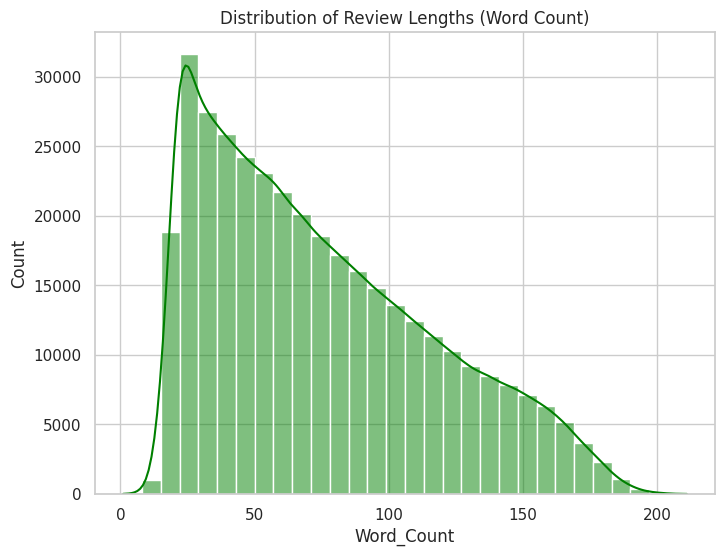

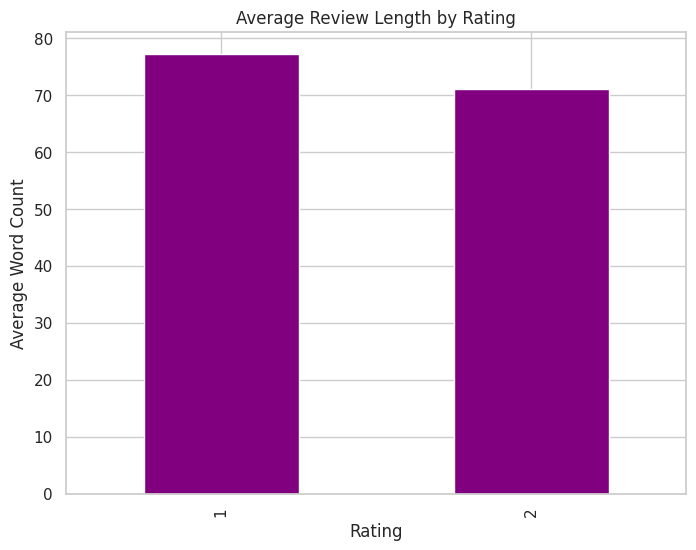

In [24]:
# Calculate word count for each review
sample_df['Word_Count'] = sample_df['Review_Text'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(8, 6))
sns.histplot(sample_df['Word_Count'], bins=30, kde=True, color='green')
plt.title('Distribution of Review Lengths (Word Count)')
plt.show()

# Average review length by rating
plt.figure(figsize=(8, 6))
sample_df.groupby('Rating')['Word_Count'].mean().plot(kind='bar', color='purple')
plt.title('Average Review Length by Rating')
plt.ylabel('Average Word Count')
plt.show()


# **5- TF-IDF Analysis**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Fit and transform the text
tfidf_matrix = tfidf.fit_transform(sample_df['Review_Text'])

# Convert TF-IDF matrix to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Display top words with highest TF-IDF scores for a sample of 5 reviews
print(tfidf_df.head(5))


   actually  album    amazon  author       bad  best    better  big      book  \
0  0.000000    0.0  0.495695     0.0  0.000000   0.0  0.000000  0.0  0.000000   
1  0.000000    0.0  0.000000     0.0  0.000000   0.0  0.000000  0.0  0.000000   
2  0.302434    0.0  0.289903     0.0  0.000000   0.0  0.472677  0.0  0.000000   
3  0.000000    0.0  0.000000     0.0  0.379931   0.0  0.000000  0.0  0.236597   
4  0.000000    0.0  0.000000     0.0  0.000000   0.0  0.000000  0.0  0.000000   

   books  ...  want  waste  watch       way  work  works  worth  written  \
0    0.0  ...   0.0    0.0    0.0  0.000000   0.0    0.0    0.0      0.0   
1    0.0  ...   0.0    0.0    0.0  0.000000   0.0    0.0    0.0      0.0   
2    0.0  ...   0.0    0.0    0.0  0.000000   0.0    0.0    0.0      0.0   
3    0.0  ...   0.0    0.0    0.0  0.342455   0.0    0.0    0.0      0.0   
4    0.0  ...   0.0    0.0    0.0  0.000000   0.0    0.0    0.0      0.0   

   year  years  
0   0.0    0.0  
1   0.0    0.0  
2   0

# **6- Topic Modeling (LDA)**

In [26]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Display top words for each topic
for i, topic in enumerate(lda.components_):
    print(f'Topic {i}:')
    print([tfidf.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topic 0:
['best', 'songs', 'good', 'great', 'set', 'sound', 'quality', 'music', 'dvd', 'cd']
Topic 1:
['just', 'songs', 'great', 'good', 'love', 'watch', 'like', 'film', 'album', 'movie']
Topic 2:
['book', 'buy', 'know', 'time', 'like', 'waste', 'just', 'game', 'don', 'money']
Topic 3:
['just', 'price', 'amazon', 'works', 'great', 'work', 'used', 'bought', 'use', 'product']
Topic 4:
['series', 'characters', 'life', 'written', 'author', 'reading', 'story', 'books', 'read', 'book']


# **7- Sentiment by Rating**

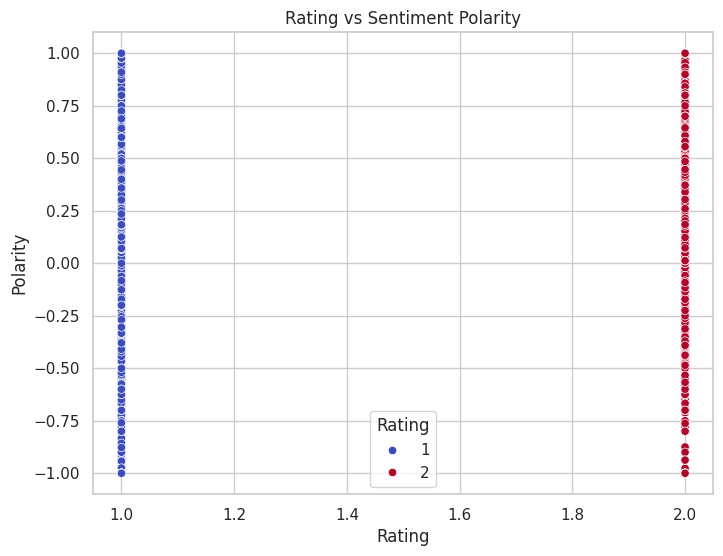

In [27]:
# Scatter plot: Rating vs Sentiment Polarity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Polarity', data=sample_df, hue='Rating', palette='coolwarm')
plt.title('Rating vs Sentiment Polarity')
plt.show()


# **8- Outlier Detection using Cosine Similarity**

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Randomly sample 10,000 reviews for cosine similarity analysis
sampled_df = sample_df.sample(n=10000, random_state=42)

# Convert sampled reviews into TF-IDF matrix
tfidf_sampled_matrix = tfidf.fit_transform(sampled_df['Review_Text'])

# Compute cosine similarity on sampled data
cosine_sim = cosine_similarity(tfidf_sampled_matrix)

# Outlier detection: Find reviews with the least similarity to others
outlier_scores = cosine_sim.sum(axis=1)
outliers = np.argsort(outlier_scores)[:5]

# Print the top 5 outlier reviews
print(sampled_df.iloc[outliers])



         Rating                                      Title  \
2546883       1           Naturally this is a joke, right?   
3337957       1     Not Impressed - lots of broken tablets   
716862        1  Take off the wheel and then steal the car   
1711117       1            Porn dressed up as respectable?   
3324732       2                           Vac Accessoreies   

                                               Review_Text  \
2546883  Sorcery? Demons? Methamphetamine is a chemical...   
3337957  I received these tablets a few days ago and to...   
716862   Nothing is stopping the theif from taking the ...   
1711117  We were amazed to see so much bare female skin...   
3324732  Helps to allow other vacuum projects to be som...   

                                            Cleaned_Review  \
2546883  sorcery demons methamphetamine is a chemical s...   
3337957  i received these tablets a few days ago and to...   
716862   nothing is stopping the theif from taking the ...   
171111

# **9- Correlation Matrix**

Analyzing the correlation between ratings and sentiment scores helps validate the effectiveness of the sentiment analysis approach. A strong positive correlation would indicate that higher ratings are typically associated with positive sentiment, affirming the reliability of the analysis.

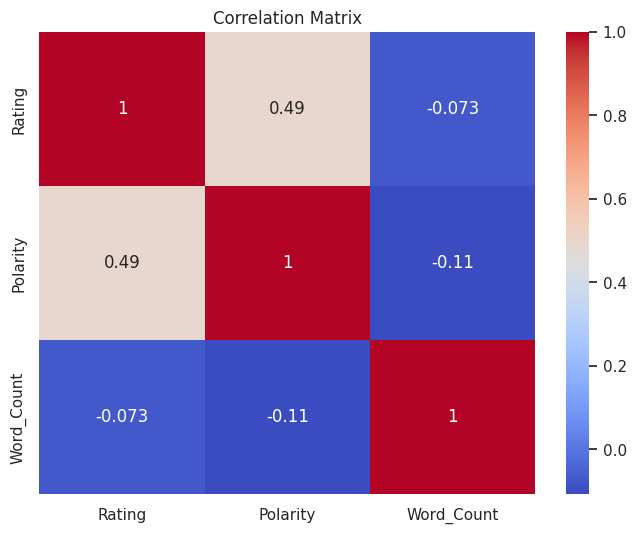

In [29]:
# Correlation matrix between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(sample_df[['Rating', 'Polarity', 'Word_Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
